<a href="https://colab.research.google.com/github/Yongshilin/forage/blob/main/Forage_Quantium_DA_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Forage_Quantium_DA Project By Yongshi Lin

In [3]:
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#Import datasets and do data cleaning:

In [4]:
pb = pd.read_csv("/content/QVI_purchase_behaviour.csv")
pb = pb.dropna()  #drop null values
pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
print(pb.shape)

(72637, 3)


In [7]:
td = pd.read_excel("/content/QVI_transaction_data.xlsx")
td = td.dropna()  #drop null values

# Function to convert Excel serial date to datetime
def excel_date_to_datetime(excel_date):
    return datetime(1899, 12, 30) + timedelta(days=int(excel_date))

td['DATE'] = td['DATE'].apply(excel_date_to_datetime)

td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
td.shape

(264836, 8)

#Merge datasets and get overview:

In [73]:
merge_df = td.merge(pb, how = 'left', on = 'LYLTY_CARD_NBR')

# Extracting brand name (assume the first word) from the prod_name and make a new column as 'BRAND'
merge_df['BRAND'] = merge_df['PROD_NAME'].apply(lambda x: x.split()[0])

# Extracting package size from the prod_name and make a new column as 'PACK_SIZE'
merge_df['PACK_SIZE'] = merge_df['PROD_NAME'].str.extract(r'(\d+g)', expand=False)

# Extracting flavor from the prod_name and make a new column as 'FAVOR'
merge_df['FLAVOR'] = merge_df['PROD_NAME'].str.extract(r'(\b\w+(?=\s\d+g))', expand=False)

merge_df.head()
merge_df.to_csv('QVI_merge_dataset.csv')  #save as csv file

In [74]:
merge_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'BRAND', 'PACK_SIZE', 'FLAVOR'],
      dtype='object')

In [11]:
merge_df.shape

(264836, 13)

In [75]:
# Check if some customers were not matched on by checking for nulls
print(merge_df['LIFESTAGE'].isnull().sum())
print(merge_df['PREMIUM_CUSTOMER'].isnull().sum())

0
0


### Text Analysis to focus on chips





In [76]:
# Extract unique product names
unique_prod_names = merge_df['PROD_NAME'].unique()

# Split to individual words
prod_words = []
for name in unique_prod_names:
    prod_words.extend(re.split(r'\s+', name))

# Filter out words containing digits
prod_words = [i for i in prod_words if not re.search(r'\d', i)]

# Filter out words without alphabetic characters
prod_words = [i for i in prod_words if re.search(r'[a-zA-Z]', i)]

# Count the words
word_count = Counter(prod_words)
print(word_count)

Counter({'Chips': 21, 'Smiths': 16, 'Crinkle': 14, 'Cut': 14, 'Kettle': 13, 'Cheese': 12, 'Salt': 12, 'Original': 10, 'Chip': 9, 'Salsa': 9, 'Doritos': 9, 'Corn': 8, 'Pringles': 8, 'RRD': 8, 'Chicken': 7, 'WW': 7, 'Sour': 6, 'Sea': 6, 'Thinly': 5, 'Vinegar': 5, 'Chilli': 5, 'Thins': 5, 'Crisps': 5, 'Natural': 4, 'Cream': 4, 'Red': 4, 'Rock': 4, 'Deli': 4, 'Supreme': 4, 'Infuzions': 4, 'CCs': 3, 'Tortilla': 3, 'Old': 3, 'El': 3, 'Paso': 3, 'Dip': 3, 'Tomato': 3, 'Mild': 3, 'Sweet': 3, 'Sensations': 3, 'Lime': 3, 'Twisties': 3, 'Soy': 3, 'Cobs': 3, 'Popd': 3, 'Woolworths': 3, 'Tostitos': 3, 'Nacho': 2, 'Grain': 2, 'Waves': 2, 'Tangy': 2, 'Burger': 2, 'Rings': 2, 'Chives': 2, 'Cheezels': 2, 'And': 2, 'Thai': 2, 'BBQ': 2, 'SR': 2, 'Swt': 2, 'French': 2, 'ChipCo': 2, 'Smith': 2, 'Honey': 2, 'Tyrrells': 2, 'Lightly': 2, 'Salted': 2, 'Medium': 2, 'Potato': 2, 'Cheetos': 2, 'Compny': 1, 'S/Cream&Onion': 1, 'ChpsHny&Jlpno': 1, 'Chili': 1, 'Mexican': 1, 'Jalapeno': 1, 'Cream&Chives': 1, 'Siracha

In [77]:
# OR Count the key words in product names and sort them
prod_words_series = pd.Series(prod_words)
word_counts = prod_words_series.value_counts(sort=True)
word_counts

Chips         21
Smiths        16
Crinkle       14
Cut           14
Kettle        13
              ..
Pesto          1
Basil          1
Mozzarella     1
Roast          1
Bolognese      1
Name: count, Length: 189, dtype: int64

In [78]:
# Sort the key words in English alphabetical order
sorted_words = sorted(word_counts.index)
print(sorted_words)

['&Chives', '&OnionStacked', '&Sr/Cream', 'Aioli', 'And', 'BBQ', 'BBQ&Maple', 'Bacon', 'Bag', 'Balls', 'Barbecue', 'Barbeque', 'Basil', 'Belly', 'Big', 'Bolognese', 'Box', 'Btroot', 'Burger', 'CCs', 'Camembert', 'Ched', 'Cheddr&Mstrd', 'Cheese', 'Cheetos', 'Cheezels', 'Chicken', 'Chikn&Garlic', 'Chili', 'Chilli', 'Chilli&', 'Chilli&Lime', 'Chimuchurri', 'Chip', 'ChipCo', 'Chipotle', 'Chips', 'Chives', 'Chnky', 'Chp', 'ChpsBtroot&Ricotta', 'ChpsFeta&Garlic', 'ChpsHny&Jlpno', 'Chs', 'Chutny', 'Co', 'Cobs', 'Coconut', 'Compny', 'Corn', 'Crackers', 'Cream', 'Cream&Chives', 'Crinkle', 'Crips', 'Crisps', 'Crm', 'Crn', 'Crnchers', 'Crnkle', 'Cut', 'D/Style', 'Deli', 'Dip', 'Dorito', 'Doritos', 'El', 'Fig', 'Flavour', 'Frch/Onin', 'French', 'FriedChicken', 'Fries', 'Garden', 'Gcamole', 'Grain', 'GrnWves', 'Honey', 'Hony', 'Hot', 'Hrb&Spce', 'Infuzions', 'Infzns', 'Jalapeno', 'Jam', 'Kettle', 'Light&', 'Lightly', 'Lime', 'Mac', 'Mango', 'Med', 'Medium', 'Mexican', 'Mexicana', 'Mild', 'Mozzarell

### Trends and Insights (for the whole dataset)

In [84]:
total_sales_sum = merge_df['TOT_SALES'].sum()
total_sales_mean = merge_df['TOT_SALES'].mean()
total_sales_median = merge_df['TOT_SALES'].median()
print(f"Total Sales Sum: {total_sales_sum}")
print(f"Total Sales Mean: {total_sales_mean}")
print(f"Total Sales Median: {total_sales_median}")

Total Sales Sum: 1934415.0000000002
Total Sales Mean: 7.3041995801175075
Total Sales Median: 7.4


In [83]:
# Highest sales by LIFESTAGE
sales_by_lifestage = merge_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
print(f"Sales by LIFESTAGE: \n{sales_by_lifestage}")

Sales by LIFESTAGE: 
LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            353767.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64


In [82]:
# Highest sales by Customer Categories
sales_by_customers = merge_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending = False)
print(f"Sales by Customer Categories: \n{sales_by_customers}")

Sales by Customer Categories: 
PREMIUM_CUSTOMER
Mainstream    750744.50
Budget        676211.55
Premium       507458.95
Name: TOT_SALES, dtype: float64


In [81]:
# Highest sales by PRODUCT NAME
sales_by_product = merge_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False)
print(f"Sales by PRODUCT NAME: \n{sales_by_product}")

Sales by PRODUCT NAME: 
PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
                                             ...   
WW Crinkle Cut      Chicken 175g             4702.2
Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
WW Crinkle Cut      Original 175g            4532.2
Woolworths Mild     Salsa 300g               4234.5
Woolworths Medium   Salsa 300g               4050.0
Name: TOT_SALES, Length: 114, dtype: float64


### Check for Outliers

In [112]:
outliers = merge_df[merge_df['TOT_SALES'] > 200]
print(f"Outliers: \n{outliers}")
# Insight: In store#226, a 'Premium' customer from 'Older Families' purchased 200 packs of 'Dorito Corn Chp Supreme 380g' in 2018 and 2019, contributed to 650*2=1300 dollars of sales in total.

Outliers: 
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES       LIFESTAGE  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   
69763  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   

      PREMIUM_CUSTOMER   BRAND PACK_SIZE   FLAVOR  
69762          Premium  Dorito      380g  Supreme  
69763          Premium  Dorito      380g  Supreme  


In [113]:
# check if this customer buy any other products
cust226000 = merge_df[merge_df['LYLTY_CARD_NBR'] == 226000]
print(cust226000)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES       LIFESTAGE  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   
69763  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   

      PREMIUM_CUSTOMER   BRAND PACK_SIZE   FLAVOR  
69762          Premium  Dorito      380g  Supreme  
69763          Premium  Dorito      380g  Supreme  


####Insight: This customer 226000 only purchased large amount of chips once a year in 2018, 2019, not like a regular retail customer. We can remove this outliner(customer) for further analysis.

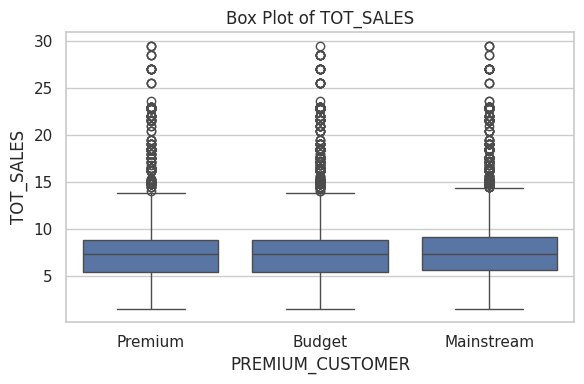

In [172]:
plt.figure(figsize=(6, 4))
sns.set(style = 'whitegrid')
removed_outliers = merge_df[merge_df['TOT_SALES'] <= 200]
sns.boxplot(data=merge_df, x="PREMIUM_CUSTOMER", y=removed_outliers["TOT_SALES"])
plt.title('Box Plot of TOT_SALES')
plt.tight_layout()
plt.show()

#### Insight: After removing the outliner,the total sales of different premium customers performs basicly the same. Total sales value range from [2,14], points (14, 30] consider potential outliners. The mean total sales value is 7.

#Focus on datasets only related to chip products transaction:

#### Given the substantial size of the sample, I will ensure that all the data I analyze pertains specifically to chips, excluding cheese products, chicken products, and salsa products, which cannot be reliably identified from the product names alone. The original dataset's product names are often ambiguous, making it difficult to discern product categories. Unless the stores provide prior confirmation that most of the products are indeed chips, I will use keywords highly related to chips to filter the relevant products.

#### I recommend that retail stores update their product naming conventions to include standardized categories, at least for the primary product categories. This would significantly improve the clarity and utility of the data for analysis.

In [115]:
# identify chips products by keywords from the text analysis
chip_keywords = ["Chip", "Chips", "Chp", "Crisps", "Crips", "Crinkle", "Crnkle"]

# Function to filter products that contain any of the chip-related keywords
def is_chip_product(prod_name, keywords):
    return any(i in prod_name for i in keywords)

# Apply the function to filter the DataFrame
chips_df = merge_df[merge_df['PROD_NAME'].apply(lambda x: is_chip_product(x, chip_keywords))]

In [157]:
# Remove the outliner(customer226000) as we observed and analyzed already above
chips_df = chips_df[chips_df['LYLTY_CARD_NBR'] != 226000]
chips_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACK_SIZE,FLAVOR
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,175g,unknown
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170g,Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175g,Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150g,Chili
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,Smiths,330g,Vinegar


In [117]:
print(chips_df['BRAND'].unique())

['Natural' 'Smiths' 'Kettle' 'Doritos' 'WW' 'Thins' 'Dorito' 'Smith'
 'Tyrrells' 'Cobs' 'French' 'Pringles' 'Tostitos' 'Snbts' 'Sunbites']


#### The product brand & flavor name has repleacable keywords:

In [118]:
# replace repeated brand names
chips_df['BRAND'] = chips_df['BRAND'].replace({'Dorito':'Doritos', 'Smith':'Smiths', 'Snbts':'Sunbites', 'Infzns':'Infuzions', 'WW': 'Woolworths'})
print(chips_df['BRAND'].unique())

['Natural' 'Smiths' 'Kettle' 'Doritos' 'Woolworths' 'Thins' 'Tyrrells'
 'Cobs' 'French' 'Pringles' 'Tostitos' 'Sunbites']


In [121]:
# replace repeated flavor names
chips_df['FLAVOR'] = chips_df['FLAVOR'].replace({'Chilli':'Chili', 'Onin':'Onion', 'OnionDip':'Onion', 'saltd': 'Salt', 'Salted': 'Salt', 'BBQ':'Barbecue'})
# fill in unknown flavor
chips_df['FLAVOR'] = chips_df['FLAVOR'].replace({'Chips':'unknown', 'Crips':'unknown', 'Crisps':'unknown', 'Bag': 'unknown', 'Supreme':'unknown'})
# fill in NaN to unkown flavor
chips_df['FLAVOR'] = chips_df['FLAVOR'].fillna('unknown')
print(chips_df['FLAVOR'].unique())

['unknown' 'Chicken' 'Onion' 'Chili' 'Vinegar' 'Jalapeno' 'Tangy'
 'Original' 'Salt' 'Salsa' 'Cheese' 'Seasonedchicken' 'Spce' 'Spicy'
 'Barbecue' 'Ricotta' 'Chipotle' 'Chives' 'Mstrd' 'Garlic' 'Sauce'
 'Vinegr' 'Bolognese']


In [122]:
# Save as csv file
chips_df.to_csv('QVI_chips_transaction.csv')

### Data Summary

In [123]:
chips_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,117892,117892.000000,1.178920e+05,117892.000000,117892.000000,117892.000000,117892.00000
mean,2018-12-29 20:45:29.711939584,135.419833,1.358951e+05,135495.136269,54.548824,1.905057,7.02792
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.70000
25%,2018-09-30 00:00:00,70.000000,7.010550e+04,68081.750000,22.000000,2.000000,5.70000
50%,2018-12-30 00:00:00,131.000000,1.312000e+05,135512.000000,55.000000,2.000000,6.60000
75%,2019-03-31 00:00:00,203.000000,2.031780e+05,203003.750000,81.000000,2.000000,8.80000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,270209.000000,112.000000,5.000000,29.50000
std,NaN,76.668968,8.053473e+04,77884.816085,34.433479,0.342933,2.53332


### Number of Transactions Over Time

In [99]:
num_trans = chips_df.groupby('DATE').size()

# hold the aggregated results, count transactions per day
num_trans = num_trans.reset_index(name='Transaction Count')

num_trans.sort_values(by = 'DATE').head()

,DATE,Transaction Count
0,2018-07-01,282
1,2018-07-02,304
2,2018-07-03,322
3,2018-07-04,311
4,2018-07-05,320


In [55]:
num_trans.shape

(364, 2)

#### Insight: Only 364 days in a year had transaction. Let's see which date and why no transaction on that specific date.

In [56]:
# Create a sequence of all dates within the range
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30')
all_dates_df = pd.DataFrame({'DATE': all_dates})

# Merge with the transaction counts
transactions_by_day = pd.merge(all_dates_df, num_trans, on='DATE', how='left').fillna(0)

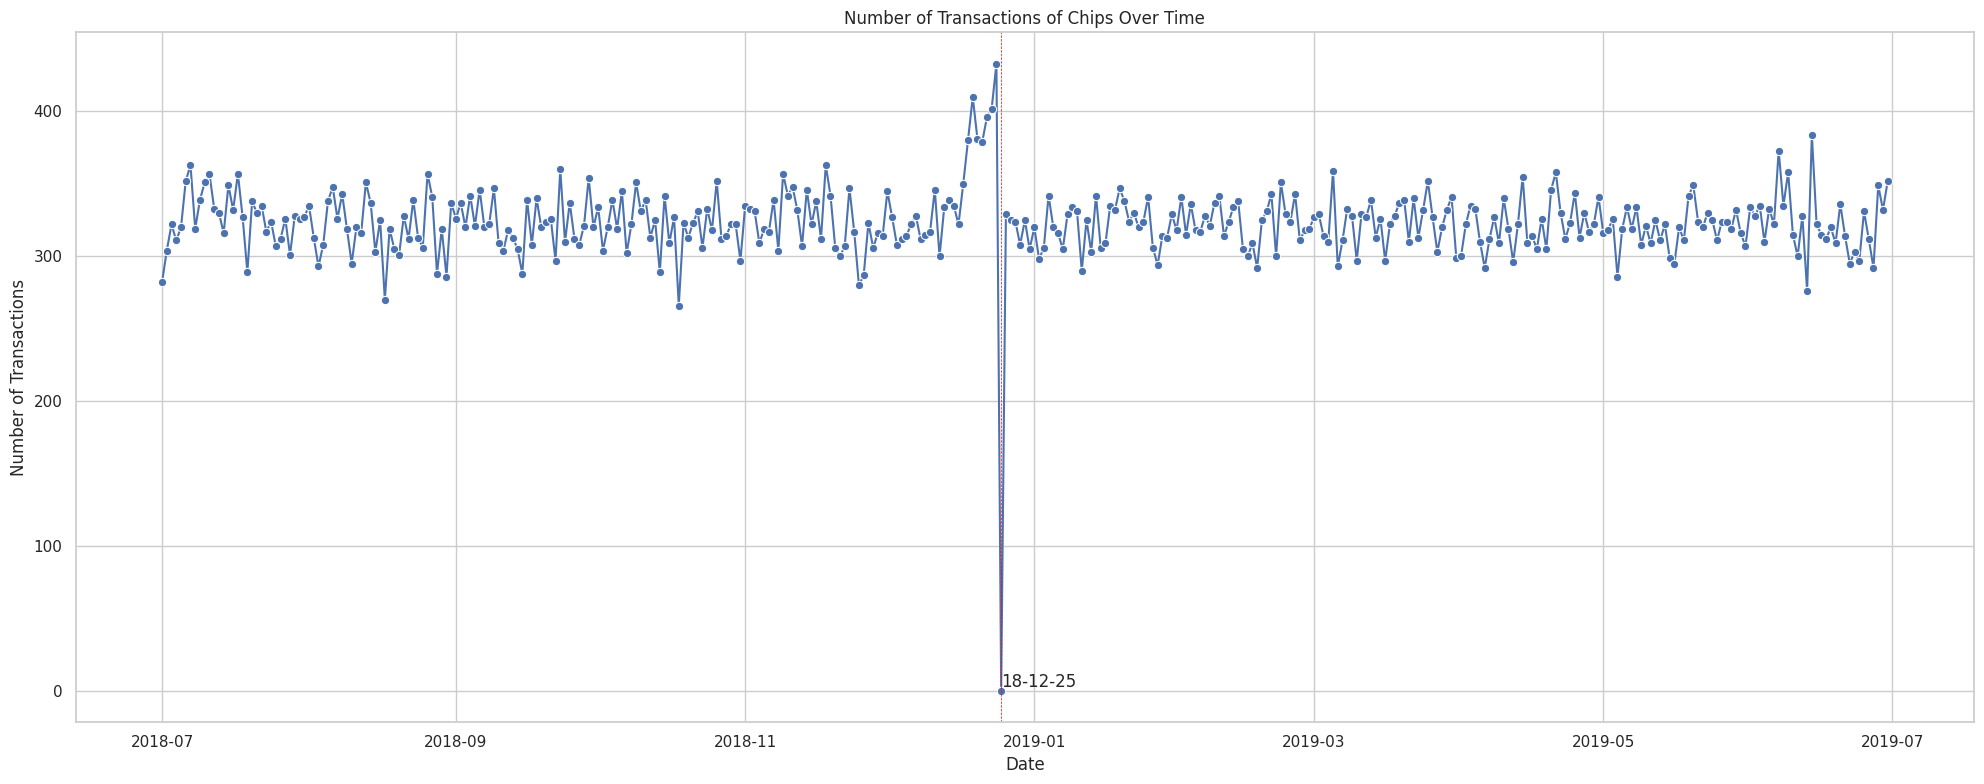

In [194]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=transactions_by_day, x='DATE', y='Transaction Count', marker='o')
plt.title('Number of Transactions of Chips Over Time')
plt.ylabel('Number of Transactions')
plt.xlabel('Date')

# Highlight the dates where transaction count is zero
zero_trans_dates = transactions_by_day[transactions_by_day['Transaction Count'] == 0]['DATE']
for zero_date in zero_trans_dates:
    plt.axvline(x=zero_date, color='red', linestyle='--', lw=0.5)
    plt.text(zero_date, 0.1, zero_date.strftime('%y-%m-%d'), verticalalignment ='bottom')
plt.tight_layout()
plt.show()

### Sales of Chips Over Time

In [58]:
# Group by DATE and sum the SALES
sales_by_date = chips_df.groupby('DATE')['TOT_SALES'].sum().reset_index()
sales_by_date.sort_values(by = 'TOT_SALES', ascending = False).head()

,DATE,TOT_SALES
176,2018-12-24,3038.4
171,2018-12-19,2892.9
175,2018-12-23,2879.0
174,2018-12-22,2725.3
172,2018-12-20,2689.8


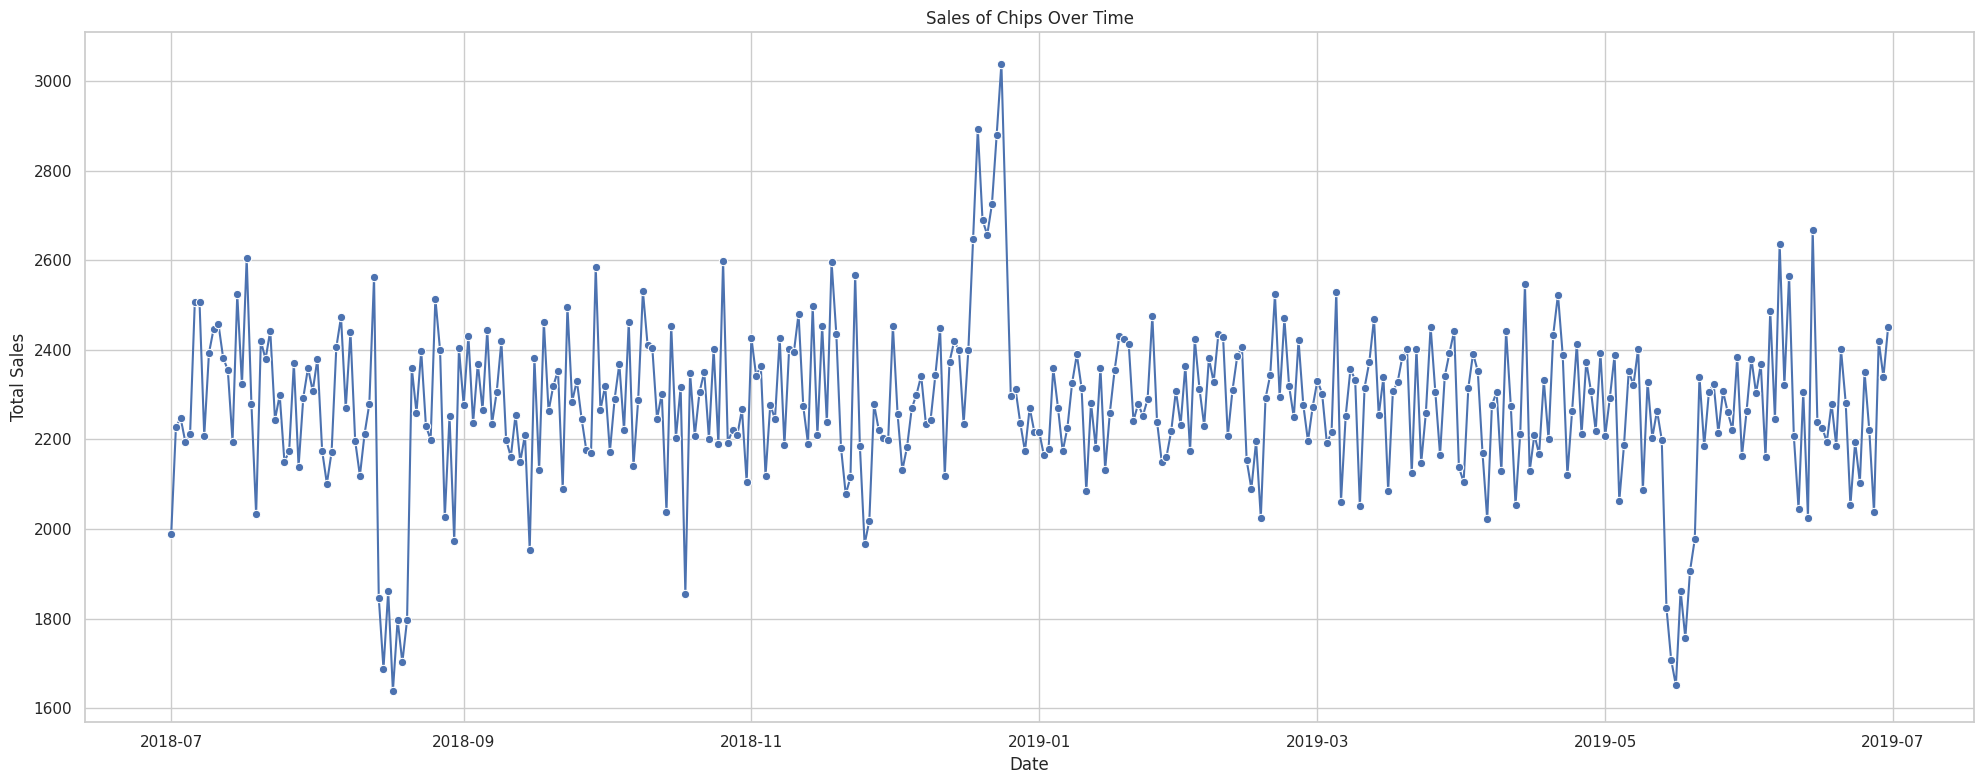

In [191]:
plt.figure(figsize=(20, 8))
sns.lineplot(data = sales_by_date, x = 'DATE', y = 'TOT_SALES', marker = 'o')
plt.title('Sales of Chips Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Insight: Only 1 day there was no transaction happened, which is on Dec 25, 2018, Christmas Day. We can assume that the stores closed on this holiday date, which is normal. Also, the day before Christmas Day had the peak number of transaction and the peak total sales of chips, which shows the customer purchasing behavior.

### Trend and Insight (for Chips)

In [163]:
# Chips' Total Sales
chips_sales_sum = chips_df['TOT_SALES'].sum()
chips_sales_mean = chips_df['TOT_SALES'].mean()
chips_sales_median = chips_df['TOT_SALES'].median()
print(f"Chips' Total Sales Sum: {chips_sales_sum}")
print(f"Chips' Total Sales Mean: {chips_sales_mean}")
print(f"Chips' Total Sales Median: {chips_sales_median}")

Chips' Total Sales Sum: 828535.6
Chips' Total Sales Mean: 7.027920469582329
Chips' Total Sales Median: 6.6


### Total Sales Distribution

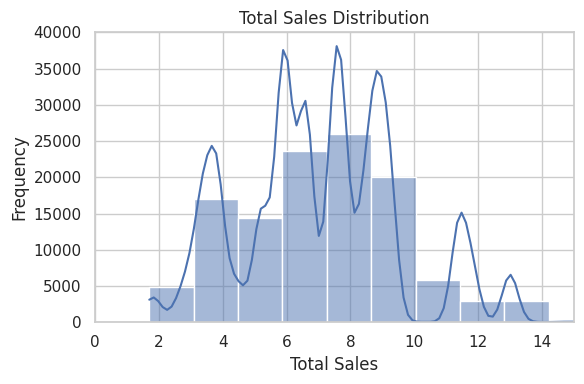

In [177]:
plt.figure(figsize=(6,4))
sns.histplot(chips_df['TOT_SALES'], bins =20, kde=True)
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')

# Adjust x-axis limits
plt.xlim(0, 15)  # Set the limit according the data distribution

plt.tight_layout()
plt.show()

#### Insight: Customers spend 2-14 dollars on chips per transaction, averagely spend 7 dollars on chips per transaction.

#### Insight: Too much unknown prefered flavors for all the customers, the analysis of flavor might be biased, thus no further exploration in flavor analysis.

In [152]:
# Count of flavor
sum_flavor = chips_df['FLAVOR'].value_counts()
sum_flavor.head()

FLAVOR
unknown     38828
Original    10748
Vinegar      7755
Chicken      6123
Salt         6084
Name: count, dtype: int64

#### Insight: For all customers, the most popular chips package size is 175g, then is 150g.

In [138]:
# Highest sales by Lifestage
chips_lifestage = chips_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending = False)
print(f"Chips' Total Sales by Lifestage: \n {chips_lifestage}.")

Chips' Total Sales by Lifestage: 
 LIFESTAGE
OLDER SINGLES/COUPLES     172447.75
RETIREES                  155591.20
OLDER FAMILIES            152144.00
YOUNG FAMILIES            136927.60
YOUNG SINGLES/COUPLES     111183.60
MIDAGE SINGLES/COUPLES     78785.90
NEW FAMILIES               21455.55
Name: TOT_SALES, dtype: float64.


In [139]:
# Highest sales by Customer Categories
chips_cust = chips_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending = False)
print(f"Chips' Total Sales by Customer Categories: \n {chips_cust}.")

Chips' Total Sales by Customer Categories: 
 PREMIUM_CUSTOMER
Mainstream    321438.30
Budget        290654.05
Premium       216443.25
Name: TOT_SALES, dtype: float64.


In [140]:
# Highest sales by Customer Categories & Lifestage
cust_sales = chips_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending = False)
print(f"Chips' Total Sales by Customer Categories & Lifestage: \n {cust_sales}.")

Chips' Total Sales by Customer Categories & Lifestage: 
 LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              71983.15
RETIREES                Mainstream          66212.85
YOUNG SINGLES/COUPLES   Mainstream          66137.80
YOUNG FAMILIES          Budget              59854.95
OLDER SINGLES/COUPLES   Budget              58569.30
                        Mainstream          57753.80
                        Premium             56124.65
RETIREES                Budget              48285.60
OLDER FAMILIES          Mainstream          45235.85
RETIREES                Premium             41092.75
YOUNG FAMILIES          Mainstream          40974.35
MIDAGE SINGLES/COUPLES  Mainstream          37920.35
YOUNG FAMILIES          Premium             36098.30
OLDER FAMILIES          Premium             34925.00
YOUNG SINGLES/COUPLES   Budget              26823.80
MIDAGE SINGLES/COUPLES  Premium             25103.65
YOUNG SINGLES/COUPLES   Premium             18222.00
M

In [141]:
# Highest sales by Product Categories
chips_prod = chips_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending = False)
print(f"Chips' Total Sales by Product Categories: \n {chips_prod}\n\n")

top_chips_names = chips_prod.head(10).index.to_list()
count_chips_prod = chips_prod.count()
print(f"We are selling {count_chips_prod} kinds of chip products.")

# Print each product name on a new line
print("For all customers, our Top 10 Best Selling Chips are:")
for name in top_chips_names:
    print(name)

Chips' Total Sales by Product Categories: 
 PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Smiths Crinkle      Original 330g           34302.6
Kettle Tortilla ChpsHny&Jlpno Chili 150g    29021.4
Kettle Tortilla ChpsBtroot&Ricotta 150g     27770.2
Kettle Tortilla ChpsFeta&Garlic 150g        27627.6
Doritos Corn Chips  Cheese Supreme 170g     27183.2
Doritos Corn Chips  Nacho Cheese 170g       26562.8
Tostitos Smoked     Chipotle 175g           26474.8
Doritos Corn Chips  Original 170g           26228.4
Tyrrells Crisps     Ched & Chives 165g      26149.2
Tyrrells Crisps     Lightly Salted 165g     25498.2
Doritos Corn Chip Mexican Jalapeno 150g     23887.5
Cobs Popd Sea Salt  Chips 110g              23852.6
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    23772.8
Doritos Corn Chip Southern Chicken 150g     23735.4
Cobs Popd Sour Crm  &Chives Chips 110g      22944.4
Pringles O

In [36]:
# Group by PROD_NAME and sum the SALES
sales_prod_name = chips_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
sales_prod_name.sort_values(by = 'TOT_SALES', ascending = False).head()

,PROD_NAME,TOT_SALES
3,Dorito Corn Chp Supreme 380g,39052.0
34,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
25,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
24,Smiths Crinkle Original 330g,34302.6
12,Kettle Tortilla ChpsHny&Jlpno Chili 150g,29021.4


### Analyze the Brands

In [158]:
# Count of brands
sum_brand = chips_df['BRAND'].value_counts()

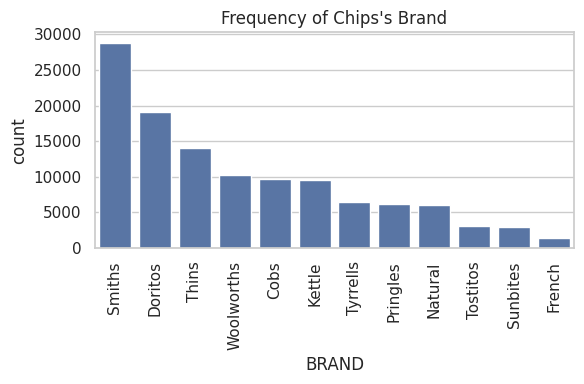

In [178]:
# Calculate the frequency of each brand and sort them
plt.figure(figsize=(6, 4))
brand_order = sum_brand.index

sns.countplot(chips_df, x='BRAND',order=brand_order)
plt.title("Frequency of Chips's Brand")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Insight: For all customers, Smiths is the most popular chips' brand; second is Doritos, third is Thins.

### Analyze the Package Size of Products

In [ ]:
# Count of package size
sum_size = chips_df['PACK_SIZE'].value_counts()
sum_size.head()

PACK_SIZE
175g    32092
150g    23330
170g    16868
110g     9693
165g     6442
Name: count, dtype: int64

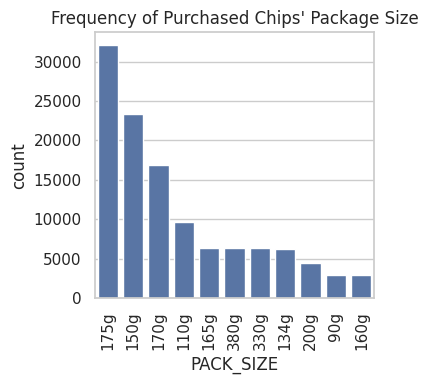

In [184]:
plt.figure(figsize=(4, 4))
size_order = chips_df['PACK_SIZE'].value_counts().index

sns.countplot(chips_df, x='PACK_SIZE', order = size_order)
plt.title("Frequency of Purchased Chips' Package Size")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Analyze of Flavor

# Customer Behavior

### Frequency of Customer Lifestage

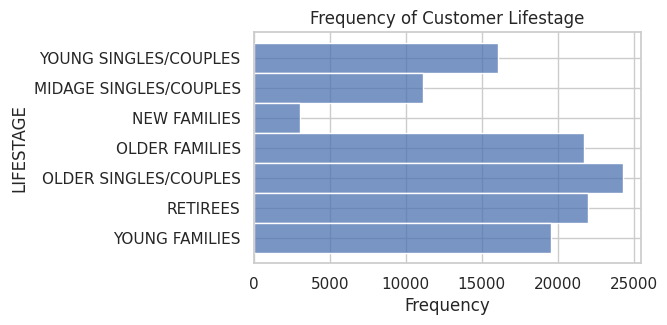

In [188]:
plt.figure(figsize=(5, 3))
sns.histplot(data=chips_df, y='LIFESTAGE')
plt.title('Frequency of Customer Lifestage')
plt.xlabel('Frequency')
plt.show()

#### Insight: 'New families' customers purchased chips the least among all the Customer Lifestage groups.

### Frequency of Customer Categories

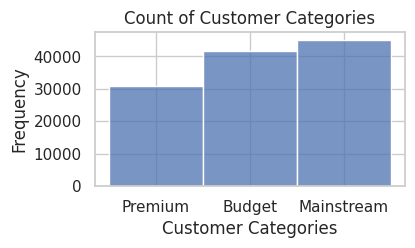

In [189]:
plt.figure(figsize=(4, 2))
sns.histplot(chips_df, x='PREMIUM_CUSTOMER')
plt.title("Count of Customer Categories")
plt.ylabel('Frequency')
plt.xlabel('Customer Categories')
plt.show()

## Sales by Customer Lifestage & Category

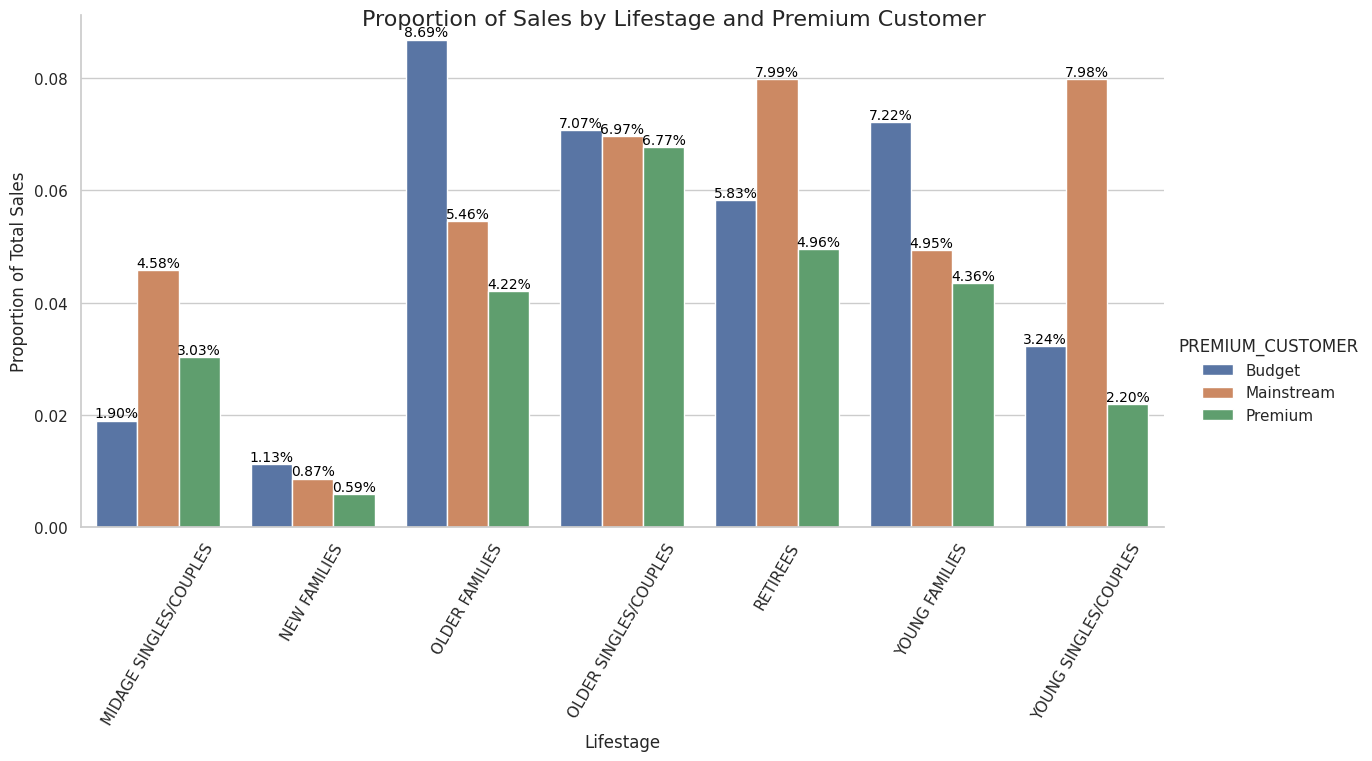

<Figure size 800x600 with 0 Axes>

In [193]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
cust_sales = chips_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Calculate total sales to get proportions
total_sales = cust_sales['TOT_SALES'].sum()
cust_sales['Proportion'] = cust_sales['TOT_SALES'] / total_sales

# Using seaborn's catplot to create a bar plot
g = sns.catplot(
    data=cust_sales,
    x='LIFESTAGE', y='Proportion', hue='PREMIUM_CUSTOMER',
    kind='bar', height=6, aspect=2
)

g.set_axis_labels("Lifestage", "Proportion of Total Sales")
g.fig.suptitle('Proportion of Sales by Lifestage and Premium Customer', fontsize=16)
g.set_xticklabels(rotation=60)

# Adding text labels with proportion percentages
for ax in g.axes.flat:
    for p in ax.patches:
      if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.show()

#### Insight: Budget - Older Families takes up the largest proporation of sales. Second is Mainstream - Retirees; third is Mainstream - Young Singles/Couples.

### Analyze the Brands Preference of the Top Customer Group Buyers (Brand Affinity)

*1) Budget - Older Families:*

In [124]:
# filter data for the target group 1(Budget - Older Families)
segment1 = chips_df[(chips_df['LIFESTAGE'] == 'OLDER FAMILIES') & (chips_df['PREMIUM_CUSTOMER'] == 'Budget')]
others1 = chips_df[~(chips_df['LIFESTAGE'] == 'OLDER FAMILIES') & (chips_df['PREMIUM_CUSTOMER'] == 'Budget')]

# caculate brand proporation for the target group
qty_sg1 = segment1['PROD_QTY'].sum()
brand_qty_sg1 = segment1.groupby(['BRAND'])['PROD_QTY'].sum().reset_index()
brand_qty_sg1['target_proportion'] = brand_qty_sg1['PROD_QTY'] / qty_sg1

# caculate brand proporation for the rest of the population
qty_others1 = others1['PROD_QTY'].sum()
brand_qty_others1 = others1.groupby(['BRAND'])['PROD_QTY'].sum().reset_index()
brand_qty_others1['others_proportion'] = brand_qty_others1['PROD_QTY'] / qty_others1

# compare proporations
brand_compar1 = pd.merge(brand_qty_sg1[['BRAND', 'target_proportion']],
                         brand_qty_others1[['BRAND', 'others_proportion']],
                         on = 'BRAND', how = 'outer').fillna(0)
brand_compar1['affinity'] = brand_compar1['target_proportion'] / brand_compar1['others_proportion']

brand_compar1_sorted = brand_compar1.sort_values(by = 'affinity', ascending = False)
print(brand_compar1_sorted.head())

         BRAND  target_proportion  others_proportion  affinity
11  Woolworths           0.102579           0.088370  1.160793
7     Sunbites           0.029437           0.026333  1.117863
6       Smiths           0.270269           0.242976  1.112328
2       French           0.013770           0.012394  1.111054
4      Natural           0.055980           0.052465  1.067000


*2) Mainstream - Retirees*

In [125]:
# filter data for the target group 2(Mainstream - Retirees)
segment2 = chips_df[(chips_df['LIFESTAGE'] == 'RETIREES') & (chips_df['PREMIUM_CUSTOMER'] == 'Mainstream')]
others2 = chips_df[~(chips_df['LIFESTAGE'] == 'RETIREES') & (chips_df['PREMIUM_CUSTOMER'] == 'Mainstream')]

# caculate brand proporation for the target group
qty_sg2 = segment2['PROD_QTY'].sum()
brand_qty_sg2 = segment2.groupby(['BRAND'])['PROD_QTY'].sum().reset_index()
brand_qty_sg2['target_proportion'] = brand_qty_sg2['PROD_QTY'] / qty_sg2

# caculate brand proporation for the rest of the population
qty_others2 = others2['PROD_QTY'].sum()
brand_qty_others2 = others2.groupby(['BRAND'])['PROD_QTY'].sum().reset_index()
brand_qty_others2['others_proportion'] = brand_qty_others2['PROD_QTY'] / qty_others2

# compare proporations
brand_compar2 = pd.merge(brand_qty_sg2[['BRAND', 'target_proportion']],
                         brand_qty_others2[['BRAND', 'others_proportion']],
                         on = 'BRAND', how = 'outer').fillna(0)
brand_compar2['affinity'] = brand_compar2['target_proportion'] / brand_compar2['others_proportion']

brand_compar2_sorted = brand_compar2.sort_values(by = 'affinity', ascending = False)
print(brand_compar2_sorted.head())

         BRAND  target_proportion  others_proportion  affinity
7     Sunbites           0.025522           0.022270  1.146030
8        Thins           0.127554           0.119247  1.069657
11  Woolworths           0.082051           0.077908  1.053177
4      Natural           0.049141           0.047065  1.044113
1      Doritos           0.168355           0.169659  0.992315


*3) Mainstream - Young Singles/Couples*

In [126]:
# filter data for the target group 3(Mainstream - Young Singles/Couples)
segment3 = chips_df[(chips_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (chips_df['PREMIUM_CUSTOMER'] == 'Mainstream')]
others3 = chips_df[~((chips_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (chips_df['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# caculate brand proporation for the target group
qty_sg3 = segment3['PROD_QTY'].sum()
brand_qty_sg3 = segment3.groupby(['BRAND'])['PROD_QTY'].sum().reset_index()
brand_qty_sg3['target_proportion'] = brand_qty_sg3['PROD_QTY'] / qty_sg3

# caculate brand proporation for the rest of the population
qty_others3 = others3['PROD_QTY'].sum()
brand_qty_others3 = others3.groupby(['BRAND'])['PROD_QTY'].sum().reset_index()
brand_qty_others3['others_proportion'] = brand_qty_others3['PROD_QTY'] / qty_others3

# compare proporations
brand_compar3 = pd.merge(brand_qty_sg3[['BRAND', 'target_proportion']],
                         brand_qty_others3[['BRAND', 'others_proportion']],
                         on = 'BRAND', how = 'outer').fillna(0)
brand_compar3['affinity'] = brand_compar3['target_proportion'] / brand_compar3['others_proportion']

brand_compar3_sorted = brand_compar3.sort_values(by = 'affinity', ascending = False)
print(brand_compar3_sorted.head())

       BRAND  target_proportion  others_proportion  affinity
10  Tyrrells           0.068509           0.053654  1.276867
5   Pringles           0.066291           0.052427  1.264438
1    Doritos           0.201331           0.159393  1.263105
3     Kettle           0.100396           0.080223  1.251451
0       Cobs           0.096919           0.081546  1.188521


#### Insight: Budget - Older Families prefer brand Woolworths, Sunbites, and Smiths; Mainstream - Retirees  prefer brand Tyrrells, Pringles, and Doritos; Mainstream - Young Singles/Couples prefer brand Sunbites, Thins, and Woolworths.

### Analyze the Product Size Preference of the Top Customer Group Buyers

*1) Budget - Older Families:*

In [127]:
# Calculate total quantity for segment1 and others
qty_sg1 = segment1['PROD_QTY'].sum()
qty_others1 = others1['PROD_QTY'].sum()

# Calculate proportions of preferred pack size for segment1
qty_sg1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
qty_sg1_by_pack['target_proporation'] = qty_sg1_by_pack['PROD_QTY'] / qty_sg1
qty_sg1_by_pack = qty_sg1_by_pack.drop(columns='PROD_QTY')

# Calculate proportions of preferred pack size for other
qty_others1_by_pack = others1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
qty_others1_by_pack['others_proporation'] = qty_others1_by_pack['PROD_QTY'] / qty_others1
qty_others1_by_pack = qty_others1_by_pack.drop(columns='PROD_QTY')

# Merge the two dataframes
pack_prop = qty_sg1_by_pack.merge(qty_others1_by_pack, on='PACK_SIZE')

# Calculate affinity to pack size
pack_prop['Size Affinity'] = pack_prop['target_proporation'] / pack_prop['others_proporation']

# Sort by affinity to pack size
pack_prop = pack_prop.sort_values(by='Size Affinity', ascending=False)

print(pack_prop.head())

   PACK_SIZE  target_proporation  others_proporation  Size Affinity
3       160g            0.029636            0.025477       1.163278
7       200g            0.043057            0.038173       1.127961
10       90g            0.029437            0.026333       1.117863
5       170g            0.148780            0.143320       1.038096
6       175g            0.280996            0.273625       1.026938


*2) Mainstream - Retirees*

In [128]:
# Calculate total quantity for segment2 and others
qty_sg2 = segment2['PROD_QTY'].sum()
qty_others2 = others2['PROD_QTY'].sum()

# Calculate proportions of preferred pack size for segment1
qty_sg2_by_pack = segment2.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
qty_sg2_by_pack['target_proporation'] = qty_sg2_by_pack['PROD_QTY'] / qty_sg2
qty_sg2_by_pack = qty_sg2_by_pack.drop(columns='PROD_QTY')

# Calculate proportions of preferred pack size for other
qty_others2_by_pack = others2.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
qty_others2_by_pack['others_proporation'] = qty_others2_by_pack['PROD_QTY'] / qty_others2
qty_others2_by_pack = qty_others2_by_pack.drop(columns='PROD_QTY')

# Merge the two dataframes
pack_prop = qty_sg2_by_pack.merge(qty_others2_by_pack, on='PACK_SIZE')

# Calculate affinity to pack size
pack_prop['Size Affinity'] = pack_prop['target_proporation'] / pack_prop['others_proporation']

# Sort by affinity to pack size
pack_prop = pack_prop.sort_values(by='Size Affinity', ascending=False)

print(pack_prop.head())

   PACK_SIZE  target_proporation  others_proporation  Size Affinity
10       90g            0.025522            0.022270       1.146030
6       175g            0.271842            0.263157       1.033002
3       160g            0.022835            0.022211       1.028106
7       200g            0.034757            0.033941       1.024048
2       150g            0.201825            0.199900       1.009627


*3) Mainstream - Young Singles/Couples*

In [129]:
# Calculate total quantity for segment3 and others
qty_sg3 = segment3['PROD_QTY'].sum()
qty_others3 = others3['PROD_QTY'].sum()

# Calculate proportions of preferred pack size for segment1
qty_sg3_by_pack = segment3.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
qty_sg3_by_pack['target_proporation'] = qty_sg3_by_pack['PROD_QTY'] / qty_sg3
qty_sg3_by_pack = qty_sg3_by_pack.drop(columns='PROD_QTY')

# Calculate proportions of preferred pack size for other
qty_others3_by_pack = others3.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
qty_others3_by_pack['others_proporation'] = qty_others3_by_pack['PROD_QTY'] / qty_others3
qty_others3_by_pack = qty_others3_by_pack.drop(columns='PROD_QTY')

# Merge the two dataframes
pack_prop = qty_sg3_by_pack.merge(qty_others3_by_pack, on='PACK_SIZE')

# Calculate affinity to pack size
pack_prop['Size Affinity'] = pack_prop['target_proporation'] / pack_prop['others_proporation']

# Sort by affinity to pack size
pack_prop = pack_prop.sort_values(by='Size Affinity', ascending=False)

print(pack_prop.head())

  PACK_SIZE  target_proporation  others_proporation  Size Affinity
9      380g            0.069827            0.053428       1.306950
4      165g            0.068509            0.053654       1.276867
8      330g            0.067070            0.052932       1.267094
1      134g            0.066291            0.052427       1.264438
0      110g            0.096919            0.081546       1.188521


#### Insight: Budget - Older Families prefer pack size 160g, 200g, then 90g; Mainstream - Young Singles/Couples prefer pack size 380g, 165g, then 330g; Mainstream - Retirees prefer pack size 90g, 175g, 160g.

### Recommendation:
1. In order to improve sales of chips, for customer category, we should target Mainstream Customer in priority; for customer lifestage, we should target older customers in priority (OLDER SINGLES/COUPLES, OLDER FAMILIES and RETIREES). For smaller customer segments, we should target Budget - Older Families, Mainstream - Retirees, and Mainstream - Young Singles/Couples.

- Specially, Mainstream - Young Singles/Couples not only contributes a lot to our sales, but also takes up the largest proporation of our amount of customers.

- Mainstream - Young & Midage singles and couples are more willing to pay more per chips, which is indicative of impulse buying behaviour. When we lay out chips in the store, we can consider put more chips in the discretionary areas/sections that favored by/is cater to them.
- Customers generally spend 2-14 dollars on chips per transaction, averagely spend 7 dollars on chips per transaction.

2. When it comes to chips brands selection, For all customers, Smiths is the most popular chips' brand; second is Doritos, third is Thins. For the top target customers, Woodworths, Sunbites, and Smiths are the most popular. Mainstream - Young Singles/Couples prefer brand Tyrrells, Pringles, and Doritos.

3. When is comes to pack size, 160g(medium-sized) and 90g(small-sized) is most favored by 2 of our target customer groups. For Mainstream - Young Singles/Couples, they prefer medium & large-sized chips (380g, 165g, 330g) . For all customers, 175g(medium to large-sized) & 170g(medium to large-sized) are the most popular size. In general, medium & large-sized chips seems more popular.

